In [1]:
 # pip install tensorflow==2.0.0-rc0

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0-rc0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['top', 'trouser', 'pulover', 'dress',
              'coat', 'sandal', 'shirt', 'sneaker',
              'bag', 'ankle boot']

#### Data Exploration

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

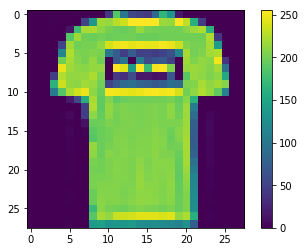

In [15]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
X_train = X_train/255.0

In [18]:
X_test = X_test/255.0

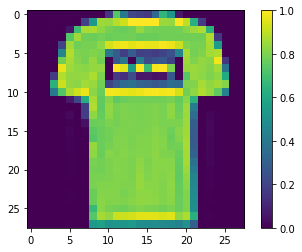

In [19]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [21]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### model comilation
- Loss Function
- Optimizer
- Metrics

In [23]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.4962 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3779 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3382 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3128 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2946 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2805 - accuracy: 0.8970
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2707 - accuracy: 0.8998
Epoch 8/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2586 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2493 - accuracy: 0.9071
Epoch 10

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [28]:
print(test_loss)

0.33369202353954314


In [29]:
print(test_acc)

0.882


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = model.predict_classes(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.882

In [34]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
pred = model.predict(X_test)

In [37]:
pred

array([[8.5855604e-08, 2.2937922e-11, 2.2870418e-08, ..., 6.6708028e-02,
        1.7389790e-06, 9.3292636e-01],
       [4.3144624e-05, 1.4171750e-13, 9.9601704e-01, ..., 5.1876311e-16,
        1.7801510e-10, 4.7042596e-12],
       [4.2704960e-09, 1.0000000e+00, 9.7257410e-12, ..., 2.7484684e-22,
        1.0902918e-14, 3.2575748e-18],
       ...,
       [9.3344326e-08, 3.1787623e-10, 2.7225228e-08, ..., 9.4515175e-14,
        9.9999905e-01, 9.1878612e-15],
       [8.1509150e-08, 9.9996305e-01, 7.5225612e-09, ..., 1.8749795e-09,
        2.1748721e-10, 3.5772498e-08],
       [3.0003309e-06, 6.3686136e-09, 5.9242425e-06, ..., 2.8367390e-04,
        2.5475406e-04, 4.1018266e-06]], dtype=float32)

In [38]:
pred[0]

array([8.5855604e-08, 2.2937922e-11, 2.2870418e-08, 1.1238447e-10,
       1.8999513e-09, 3.6211894e-04, 1.5749940e-06, 6.6708028e-02,
       1.7389790e-06, 9.3292636e-01], dtype=float32)